In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from collections import Counter
import ast
warnings.filterwarnings('ignore')
%matplotlib inline

import util_functions as util

## Load Dataset

In [2]:
DataTable = pd.read_csv('homework_data.csv')

DataTable['date_dt'] = pd.to_datetime(DataTable['date_dt'])

## Dataset features
- sku_cd = product code

- store_cd = store code

- iso_week_id = year and week number 

- date_dt = record date

- size_range_cd = product size chart

- main_group_class_cd = values from '01' to '19' which represents product's attributes

- product_brand_cd = brand of the product; the possible values are 'PBC1', 'PBC2', 'PBC3'

- size_sold_qt = product's sizes sold in a specified date and store

- size_in_stock = stock product's sizes in a specified date and store

- no_return_regular_sales_qt = regular sales

- no_return_promotional_sales_qt = promotional sales

- sales_qt = total sales in a specified date and store

- is_in_stock = True if the product is present in the stor's stock

In [3]:
DataTable.columns

Index(['sku_cd', 'store_cd', 'iso_week_id', 'date_dt', 'size_range_cd',
       'main_group_class_cd', 'product_brand_cd', 'size_sold_qt',
       'size_in_stock', 'no_return_regular_sales_qt',
       'no_return_promotional_sales_qt', 'sales_qt', 'is_in_stock'],
      dtype='object')

In the **_Dictionary_Single_Values_** variable, for each label all the unique values are saved

In [4]:
Dictionary_Single_Values = util.Single_Values_of_a_DataTable(DataTable)

for i in Dictionary_Single_Values:
    print(i + ' : shape = ' + str(len(Dictionary_Single_Values[i])))

sku_cd : shape = 920
store_cd : shape = 2
iso_week_id : shape = 208
date_dt : shape = 208
size_range_cd : shape = 6
main_group_class_cd : shape = 19
product_brand_cd : shape = 2
size_sold_qt : shape = 4255
size_in_stock : shape = 15297
no_return_regular_sales_qt : shape = 22
no_return_promotional_sales_qt : shape = 31
sales_qt : shape = 34
is_in_stock : shape = 1


In [5]:
print(Dictionary_Single_Values["size_range_cd"])

['D', 'I2', 'I', 'CI', 'CC', 'CB']


Regarding the labels _'size_in_stock'_ and _'size_sold_qt' the **_Dictionary_Single_Values_** is not useful

In [6]:
print(Dictionary_Single_Values['size_in_stock'])

['36_35M_34M_36M', '38_34M_36M_38M_37M_36_35M', '38M_38_36_35M_34M_36M', '36_34M_36M', '38_34M_36M_38M_36_37M_35M', '38M_38_36_37M_35M_34M_36M', '38M_38_37M_36_35M_34M_36M', '36_34M_35M_36M', '38_36M_38M_36_37M_35M_35_37', '38_34M_36M_38M_37M_36_35M_35_37', '38_34M_36M_38M_36_37M_35M_35_37', '38_34M_36M_35_38M_36_37M_35M_37', '38_34M_36M_35_38M_37M_36_35M_37', '38_36M_38M_37M_36_35M_35_37', '38_36M_35_38M_36_37M_35M_37', '38_35M_35', '5M_6M_8_9_7M_11_11M_10M_10_9M_6_5_8M', '5M_6M_9_11_11M_10M_9M_7_5_6_8M', '5M_6M_8_9_11_11M_10M_5_6_8M', '6M_5_5M_8_9_7M_11_11M_10M_9M_7_10_6_8M', '5M_6M_8_9_11_11M_10M_9M_5_6_8M', '5M_7_6M_6_9_5_11M', '5M_7_6M_5_6_11M', '5M_6M_9_11M_7_5_6_10M', '5M_6M_9_11_11M_10M_9M_7_6_5_8M', '5M_8M_6M_9_11_11M_7_9M_6_5_10M', '5M_7_6M_6_5_11M', '5M_6M_9_11M_7_6_5_10M', '5M_8M_6M_9_11_11M_7_9M_5_6_10M', '5M_8M_6M_9_11_11M_9M_7_5_6_10M', '5M_6M_8_9_7M_11_11M_10M_7_10_5_9M_6_8M', '5M_6M_9_7M_7_6_5', '5M_5', '10M_7_5', '5M_6M_7M_7_5_6', '10M_5', '5M_7_6M_5_6', '5M_7_6M_5_6_

I construct a new DataTable, where the values regarding _'size_in_stock'_ and _'size_sold_qt' labels are now two lists containing all the sizes

In [7]:
DataTable_sizes = DataTable
for i in range(len(DataTable['size_in_stock'])):

    DataTable_sizes['size_in_stock'][i] = sorted(DataTable['size_in_stock'][i].split('_'))

    sold_sized = DataTable['size_sold_qt'][i][8:-1]
    if len(sold_sized) == 0:
        DataTable_sizes['size_sold_qt'][i] = {}
    else:
        DataTable_sizes['size_sold_qt'][i] = ast.literal_eval(sold_sized)

## Time-Dependent Sales Plots

The total sales for each store are plotted. 

As one could see from the comparison plot, the store _'A'_ has fewer sales then the store _'B'_ for almost all the time considered. This difference is highlighted also from the bar-plot 

_util.plot_total_sales(DataTable, label_date='date_dt', label_plot='sales_qt', label_groups='', group_value='')_ is the function used to plot the total sales over time. Using the attributes _label\_groups_ and _group\_value_ one is able to consider only a certain type of sales, for example considering only a single store.

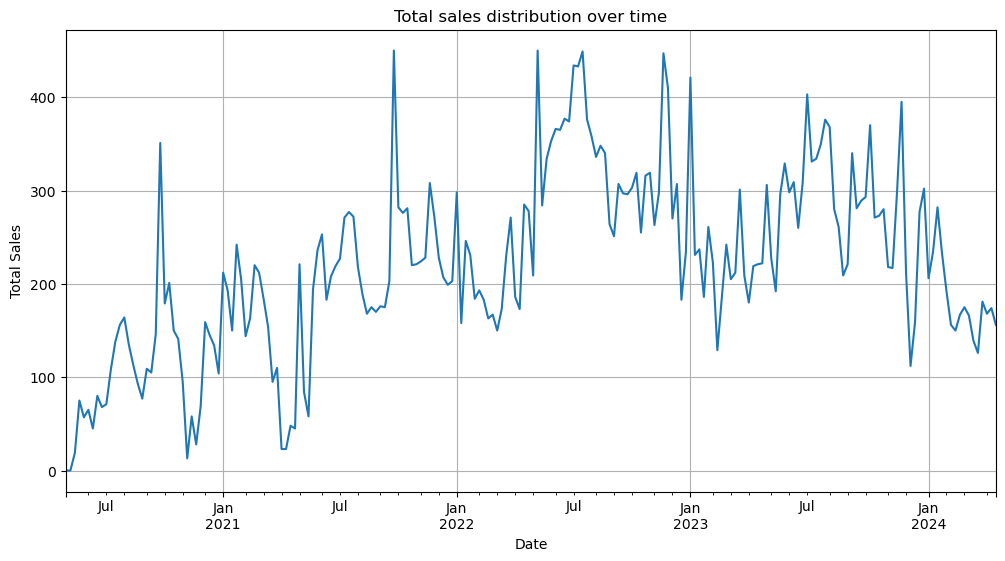

In [8]:
#util.plot_total_sales(DataTable, label_date='date_dt', label_plot='sales_qt', label_groups='store_cd', group_value='A')
#util.plot_total_sales(DataTable, label_date='date_dt', label_plot='sales_qt', label_groups='store_cd', group_value='B')
util.plot_total_sales(DataTable, label_date='date_dt', label_plot='sales_qt', label_groups='', group_value='')

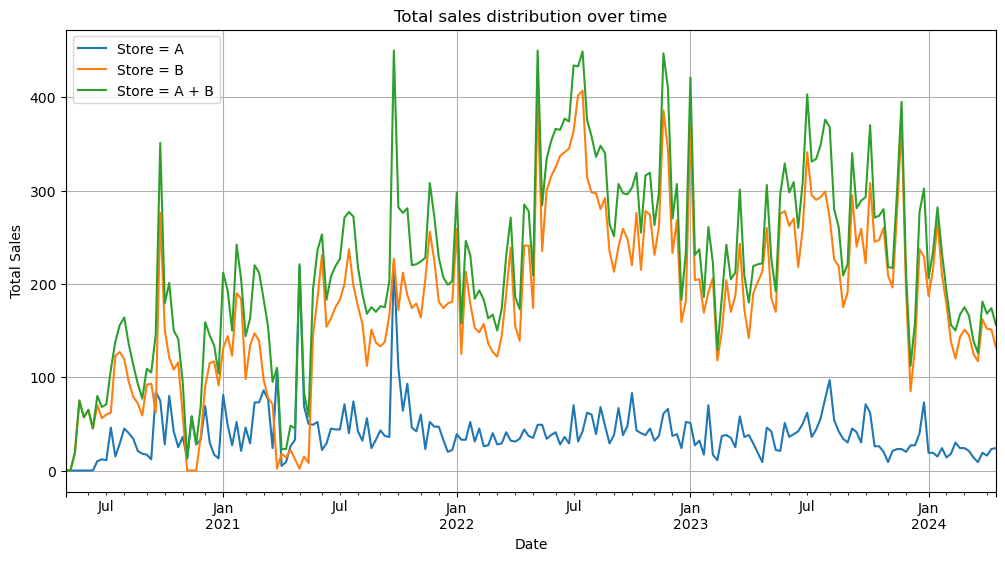

In [9]:
plt.figure(figsize=(12, 6))

DataTable[DataTable['store_cd'] == 'A'].groupby('date_dt')['sales_qt'].sum().plot(label='Store = A')
DataTable[DataTable['store_cd'] == 'B'].groupby('date_dt')['sales_qt'].sum().plot(label='Store = B')

DataTable.groupby('date_dt')['sales_qt'].sum().plot(label='Store = A + B')

plt.title('Total sales distribution over time')

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

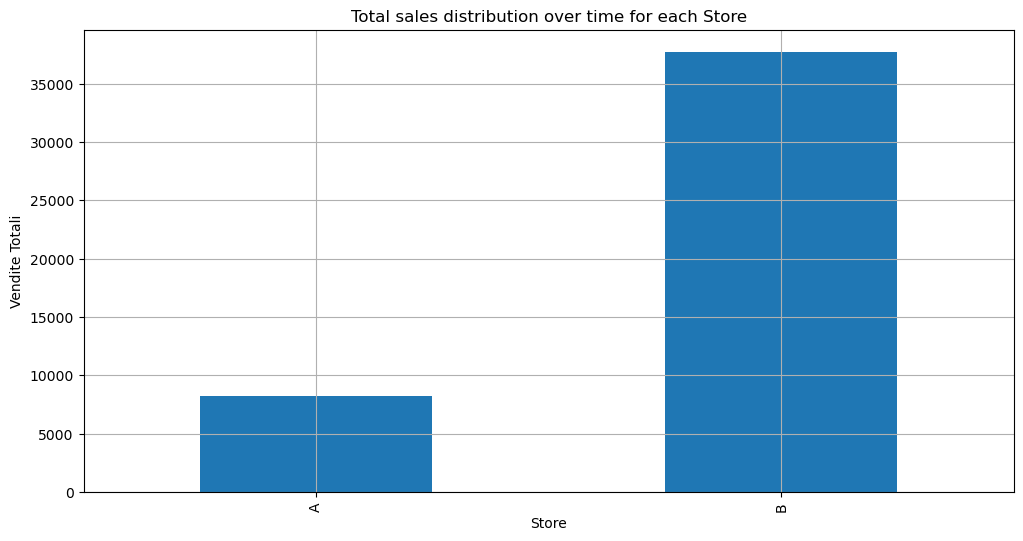

In [10]:
util.groupby_sum_plot(DataTable, 'store_cd', 'sales_qt', title='Total sales distribution over time for each Store',
                 xlabel='Store', ylabel='Vendite Totali')

## Regular vs Promo sales

There's a huge peak of promo sales percentage around November 2020 - February 2021, then the mean is around 0.3-0.4 % for the other months considered, with some little peaks during the usual promo months such as January and July.

From the comparison plot between _Regular Sales_ and _Discount Sales_ it seems that the big peak of promo sales helped the stores to be known by the customers, and, after that, the total sales increased more and more.

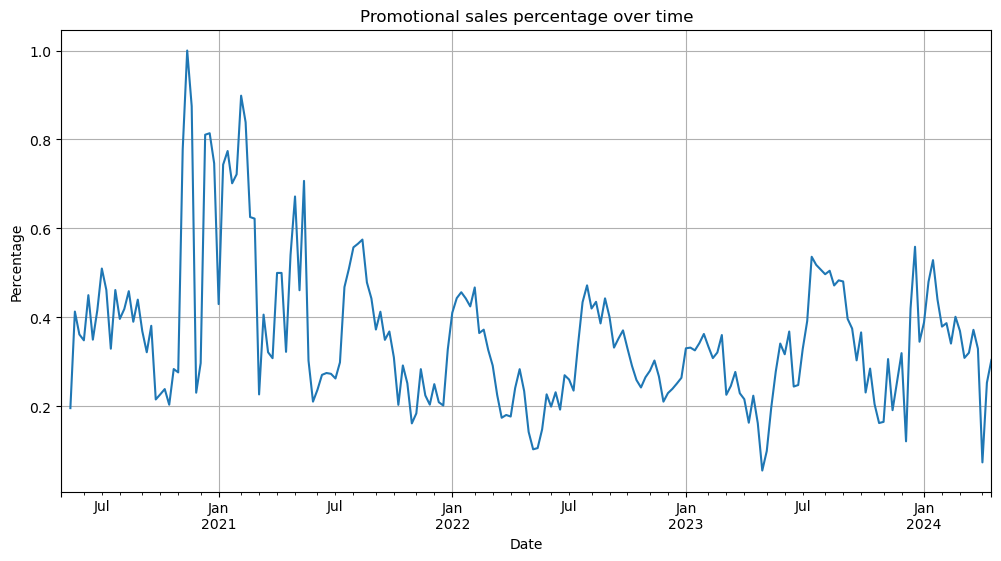

In [11]:
DataTable['promo_sales_ratio'] = DataTable['no_return_promotional_sales_qt'] / DataTable['sales_qt']
promo_effect = DataTable.groupby('date_dt')['promo_sales_ratio'].mean()
plt.figure(figsize=(12, 6))
promo_effect.plot()
plt.title('Promotional sales percentage over time')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

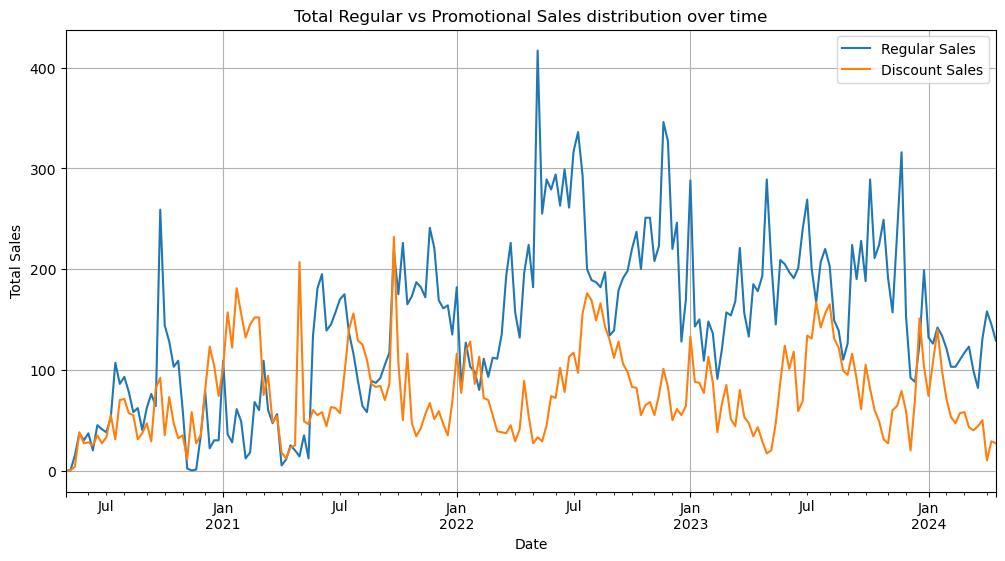

In [12]:
DataTable['date_dt'] = pd.to_datetime(DataTable['date_dt'])
plt.figure(figsize=(12, 6))
Regular_Sales = DataTable.groupby('date_dt')['no_return_regular_sales_qt'].sum()
Discount_Sales = DataTable.groupby('date_dt')['no_return_promotional_sales_qt'].sum()
Regular_Sales.plot(label='Regular Sales')
Discount_Sales.plot(label='Discount Sales')
plt.title('Total Regular vs Promotional Sales distribution over time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

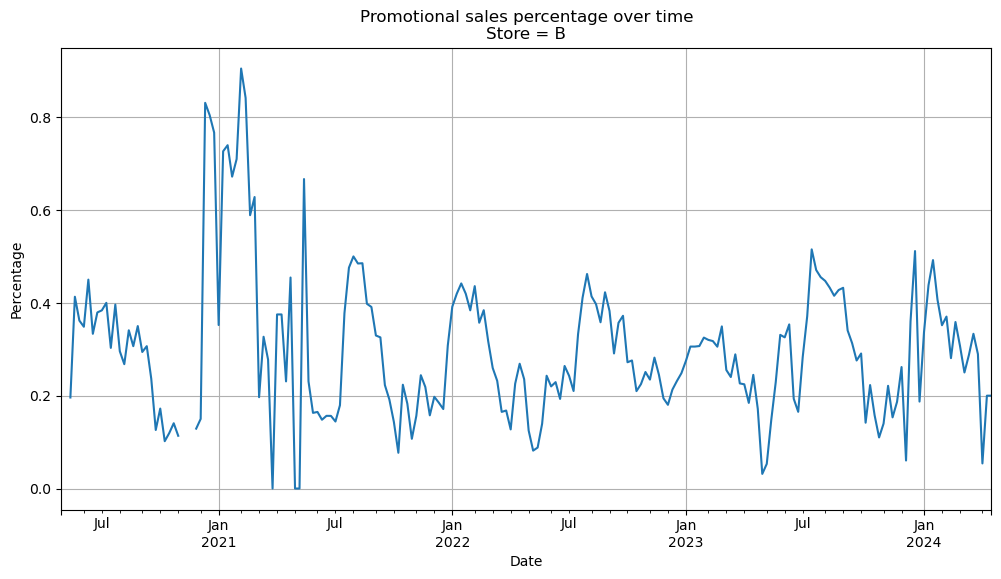

In [13]:
DataPromotion = DataTable[DataTable['store_cd'] == 'B']
DataPromotion['promo_sales_ratio'] = DataPromotion['no_return_promotional_sales_qt'] / DataPromotion['sales_qt']
promo_effect = DataPromotion.groupby('date_dt')['promo_sales_ratio'].mean()
plt.figure(figsize=(12, 6))
promo_effect.plot()
plt.title('Promotional sales percentage over time\nStore = B')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

## Top 10 products sold 

_util.groupby_sum_plot(DataTable, group, target_plot, title='', nlargest=-1, xlabel='', ylabel='')_ is the function used to bar-plot the dataset. The attributes are:
- group: the dataset feature for which the DataTable is grouped-by
- target\_plot: the dataset feature that is plotted
- nlargest: it considers only the top n values in descending order
- xlabel, ylabel: if these attributes remain equalt to '', then in the plot label the values of _group_ and _target\_plot_ are set

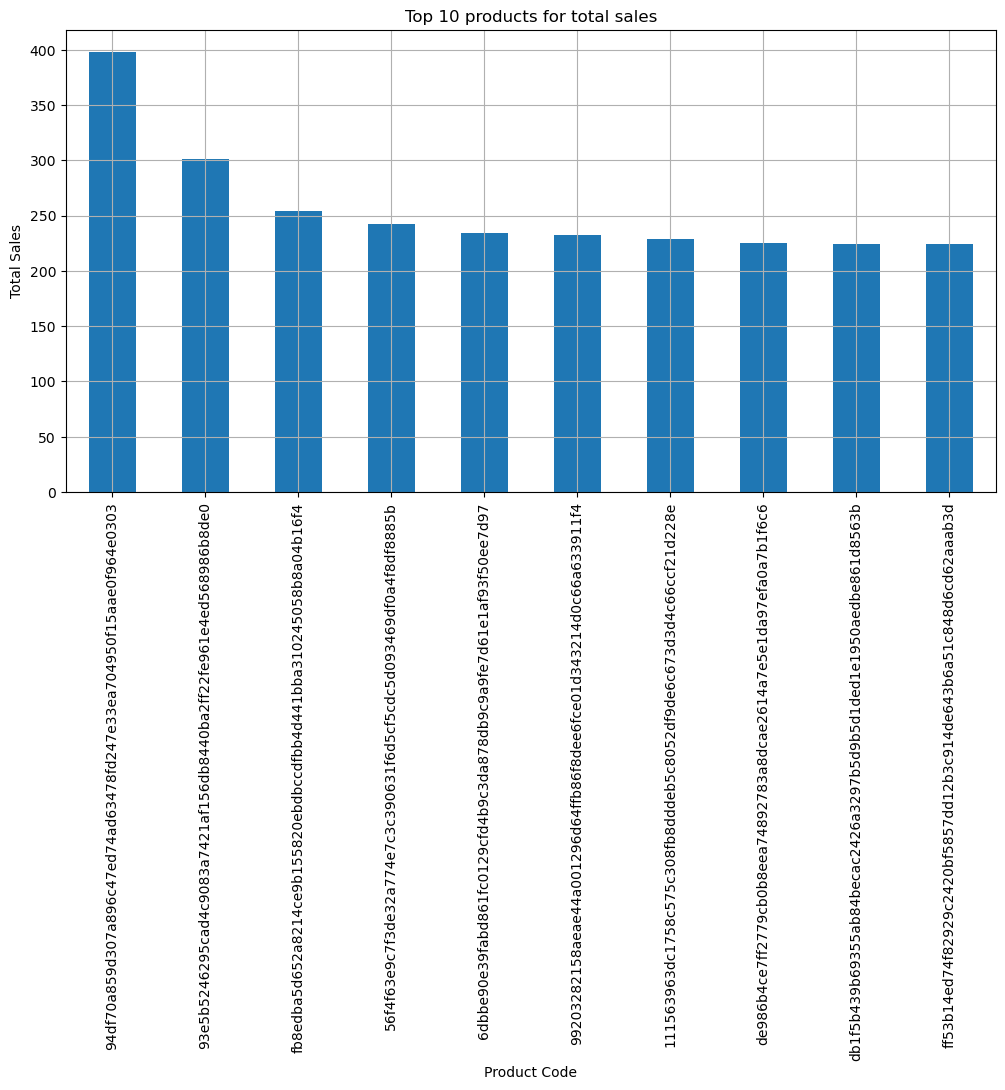

In [14]:
util.groupby_sum_plot(DataTable, 'sku_cd', 'sales_qt', title='Top 10 products for total sales', 
                 nlargest=10, xlabel='Product Code', ylabel='Total Sales')

## Total sales for each brand

There's a clear gap between the two brands present in the dataset. 

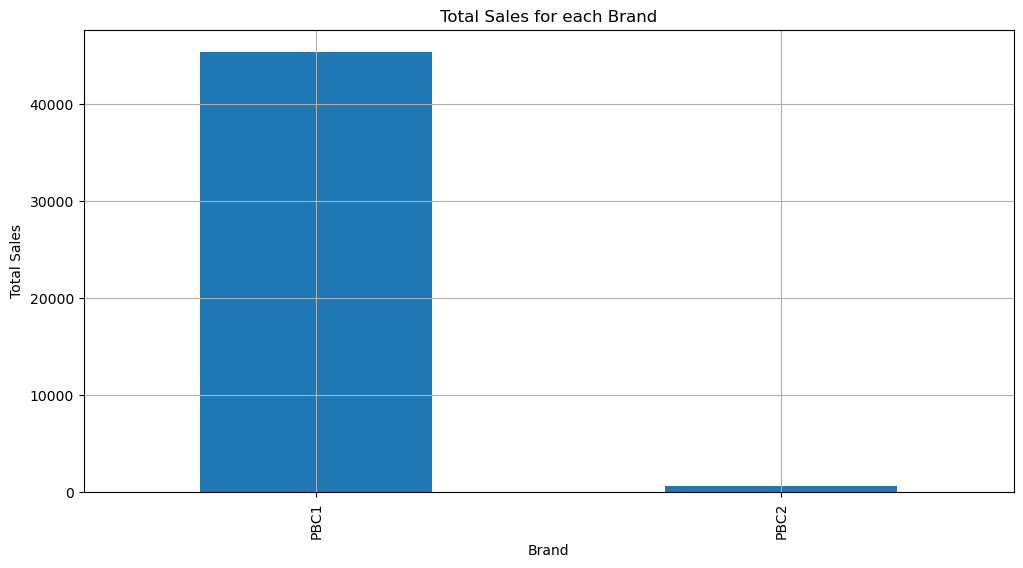

In [15]:
util.groupby_sum_plot(DataTable, 'product_brand_cd', 'sales_qt', title='Total Sales for each Brand', 
                 xlabel='Brand', ylabel='Total Sales')

_Store 'A'_ has both brands but has less fewer total sells with respect to _Store 'B'_ that has only _brand 'PBC1'_

Considering only _Store 'A'_, the only brand sold in the other store is more sold

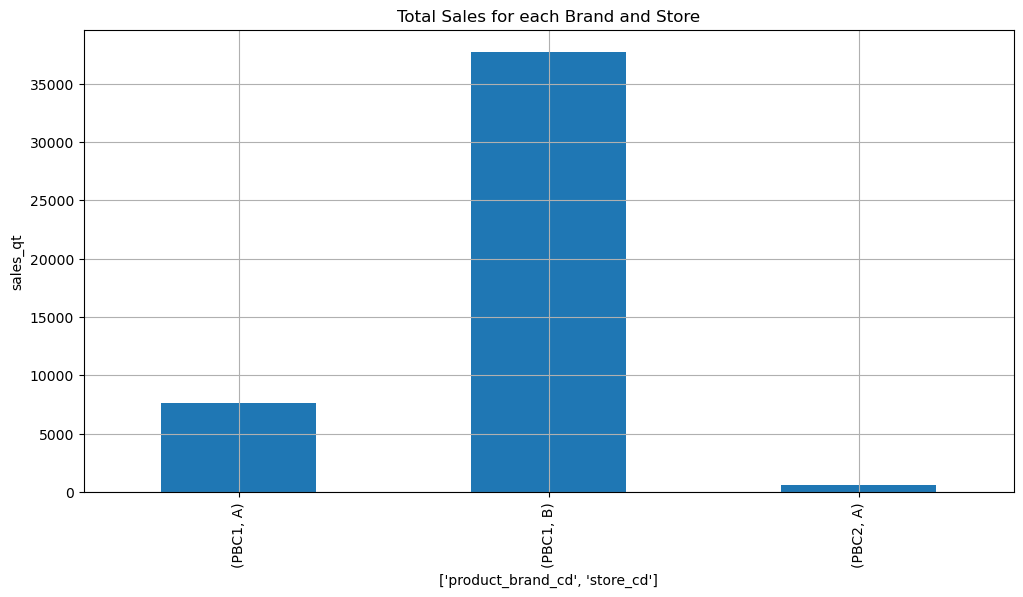

In [16]:
util.groupby_sum_plot(DataTable, ['product_brand_cd', 'store_cd'], 'sales_qt', title='Total Sales for each Brand and Store')

## Sales for each group class

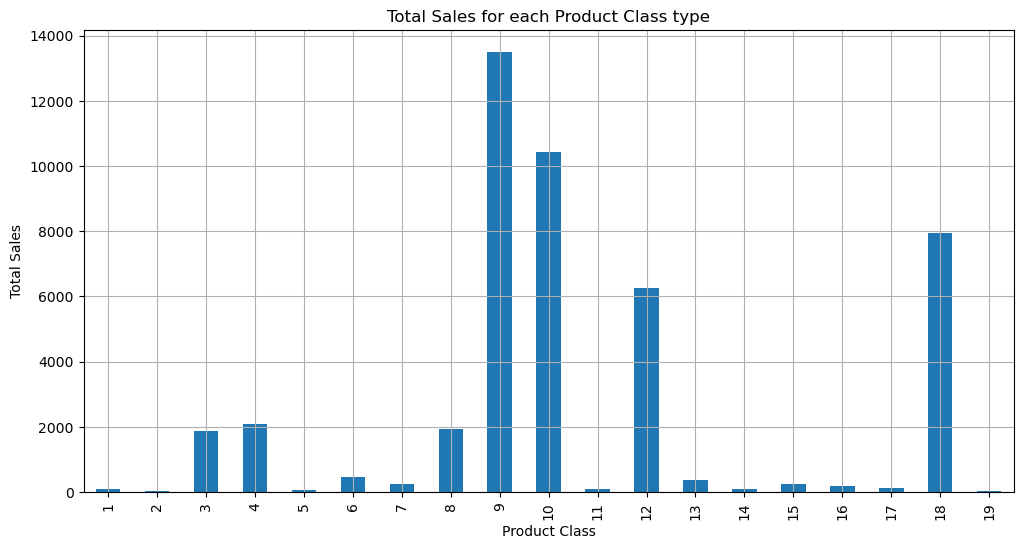

In [17]:
util.groupby_sum_plot(DataTable, 'main_group_class_cd', 'sales_qt', title='Total Sales for each Product Class type', 
                 xlabel='Product Class', ylabel='Total Sales')

## Stock vs Sold sizes

#### Top 10 stock sizes for each products type
There are 6 types of products: _['D', 'I2', 'I', 'CI', 'CC', 'CB']_

Types _['D', 'I2', 'I']_ are the products types with most stocks 

On the other side the _'CC'_ type has only 15 products in stock

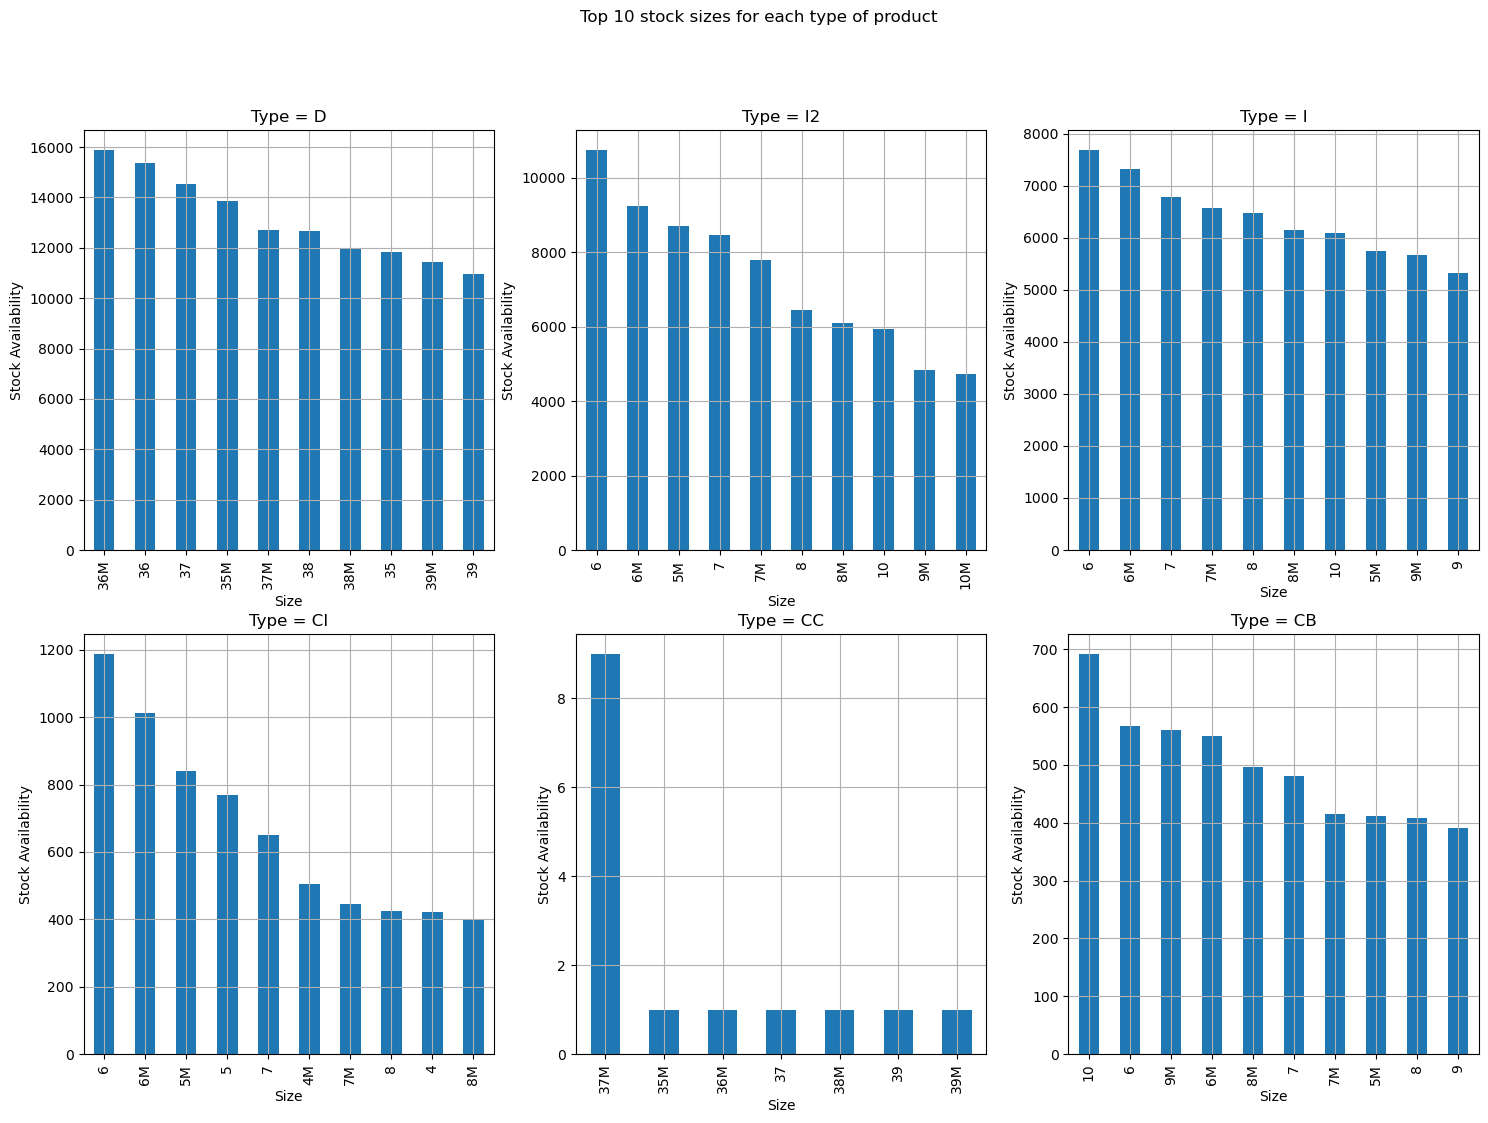

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(18,12))
plt.suptitle('Top 10 stock sizes for each type of product')
axs = axs.flatten()
count = 0

for product_type in Dictionary_Single_Values['size_range_cd']:

    filtered_Table = DataTable_sizes[DataTable_sizes['size_range_cd'] == product_type]

    size_in_stock_list = filtered_Table['size_in_stock']
    all_sizes_in_stock = [size for sublist in size_in_stock_list for size in sublist]
    size_in_stock_counter = Counter(all_sizes_in_stock)

    #plt.figure(figsize=(12, 6))
    aaa = pd.Series(size_in_stock_counter).nlargest(10)
    aaa.plot(ax = axs[count], kind='bar')

    axs[count].set_title(f'Type = {product_type}')
    axs[count].set_xlabel('Size')
    axs[count].set_ylabel('Stock Availability')
    axs[count].grid(True)

    count = count + 1

#### Top 10 sold sizes for each products type
More a product type is present in stock, more their products are sold 

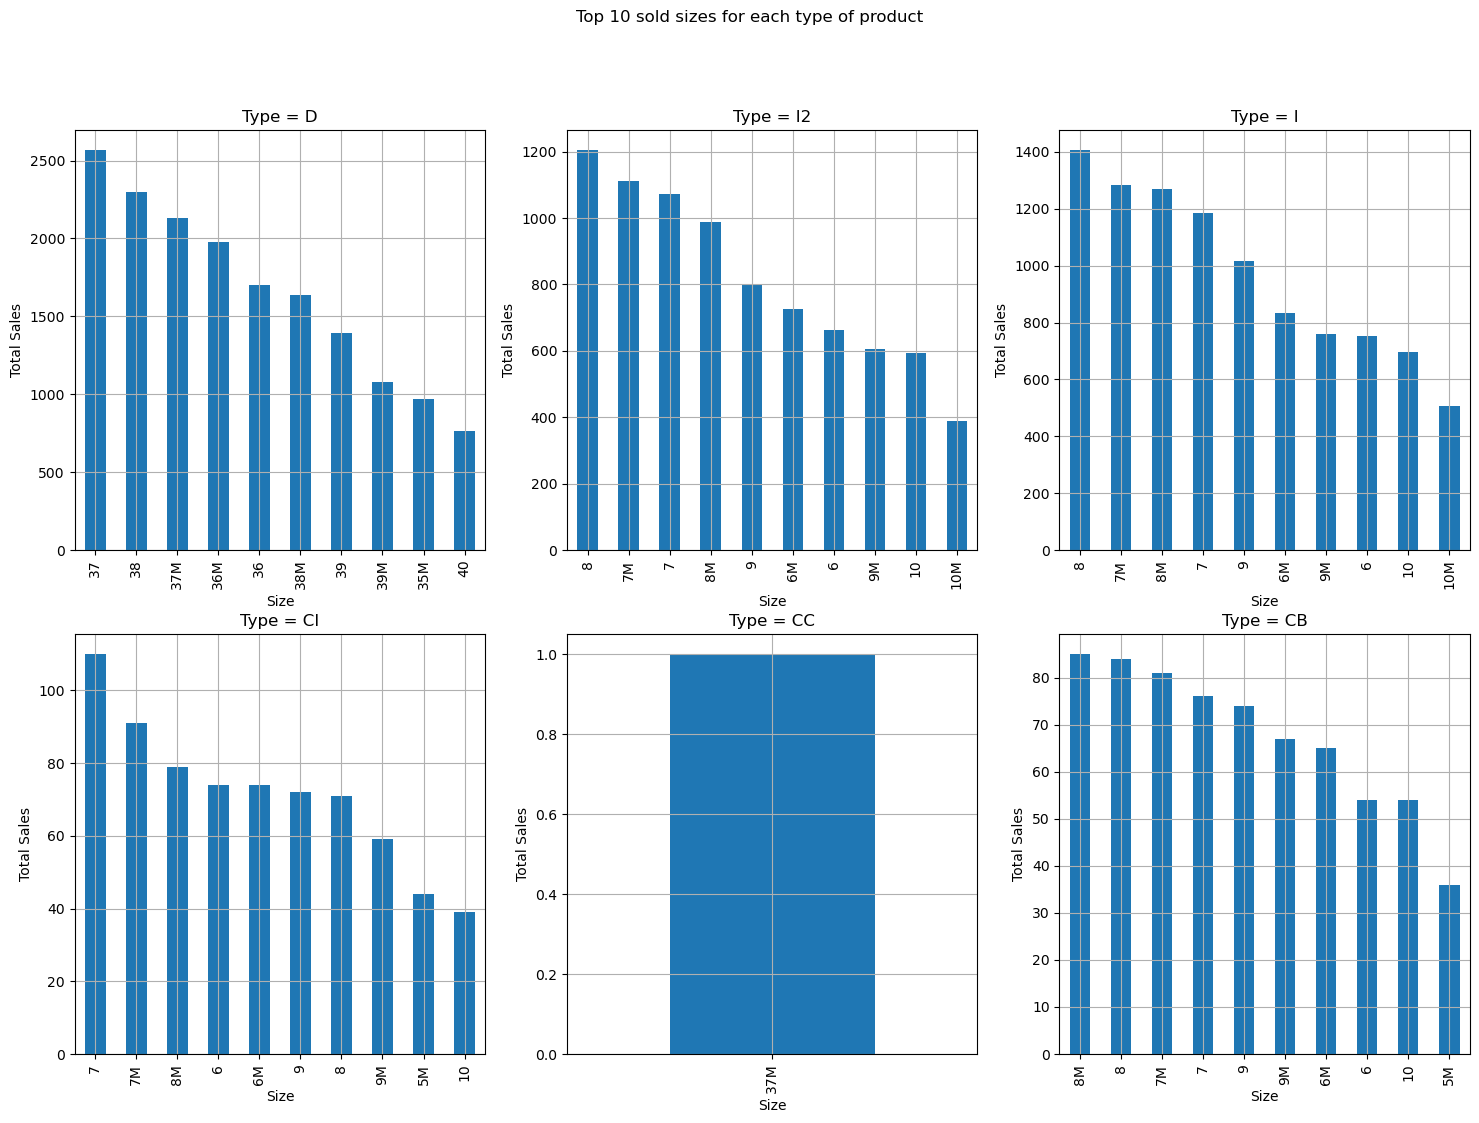

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(18,12))
plt.suptitle('Top 10 sold sizes for each type of product')
axs = axs.flatten()
count = 0

for product_type in Dictionary_Single_Values['size_range_cd']:

    filtered_Table = DataTable_sizes[DataTable_sizes['size_range_cd'] == product_type]

    size_in_stock_list = filtered_Table['size_sold_qt']
    all_sizes_in_stock = [size for sublist in size_in_stock_list for size in sublist]
    size_in_stock_counter = Counter(all_sizes_in_stock)

    #plt.figure(figsize=(12, 6))
    aaa = pd.Series(size_in_stock_counter).nlargest(10)
    aaa.plot(ax = axs[count], kind='bar')

    axs[count].set_title(f'Type = {product_type}')
    axs[count].set_xlabel('Size')
    axs[count].set_ylabel('Total Sales')
    axs[count].grid(True)

    count = count + 1

#### Comparison between stock sizes and sold sizes

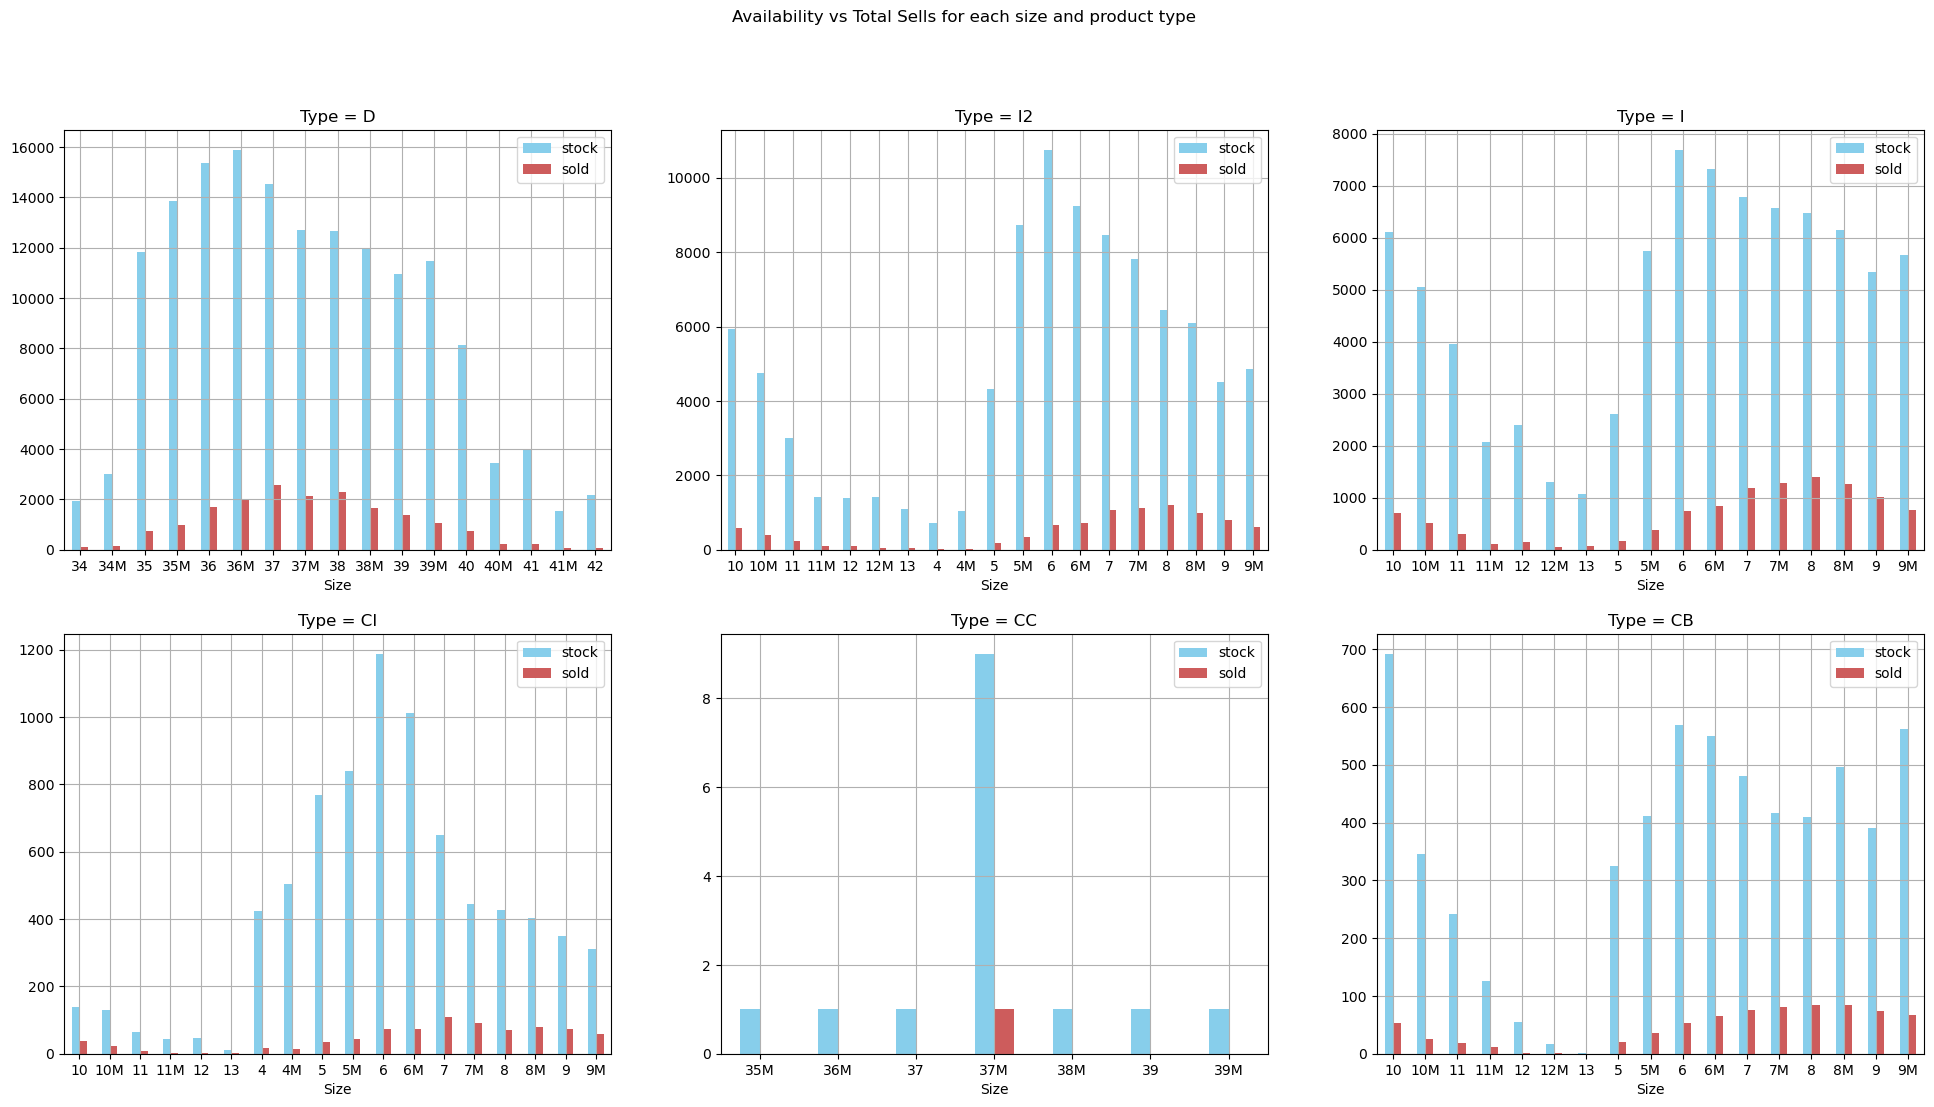

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(24,12))
plt.suptitle('Availability vs Total Sells for each size and product type')
axs = axs.flatten()
count = 0

sizes_for_each_type = {}

for product_type in Dictionary_Single_Values['size_range_cd']:

    filtered_Table = DataTable_sizes[DataTable_sizes['size_range_cd'] == product_type]

    size_in_stock_list = filtered_Table['size_in_stock']
    all_sizes_in_stock = [size for sublist in size_in_stock_list for size in sublist]
    size_in_stock_counter = Counter(all_sizes_in_stock)

    size_sold_list = filtered_Table['size_sold_qt']
    all_sizes_sold = [size for sublist in size_sold_list for size in sublist]
    size_sold_counter = Counter(all_sizes_sold)

    stock_series = pd.Series(size_in_stock_counter).nlargest(30)
    sold_series = pd.Series(size_sold_counter).nlargest(30)

    df = pd.DataFrame({"stock":stock_series,"sold":sold_series})
    axs[count] = df.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title=f"Type = {product_type}", ax=axs[count])

    #axs[count].set_title(f'type = {product_type}')
    axs[count].set_xlabel('Size')
    #axs[count].set_ylabel('Disponibilità in Stock')
    axs[count].grid(True)

    count = count + 1
    sizes_for_each_type[product_type] = size_in_stock_counter

## Sizes availability

In [21]:
DataTable_sizes_availability, DataTable_sizes_sold = util.function_DataTable_sizes_and_sold(DataTable_sizes, sizes_for_each_type, label_type='size_range_cd')

_plot_size_stock_vs_sold(DataT_available, DataT_sold, product_type, size)_ is the function used to time-plot the availability and sales for each product type and size

_Product type_ = _'D'_ is the type with more availability and sales. From the plot one could observe that each size is available in the stock despite the continuous sells

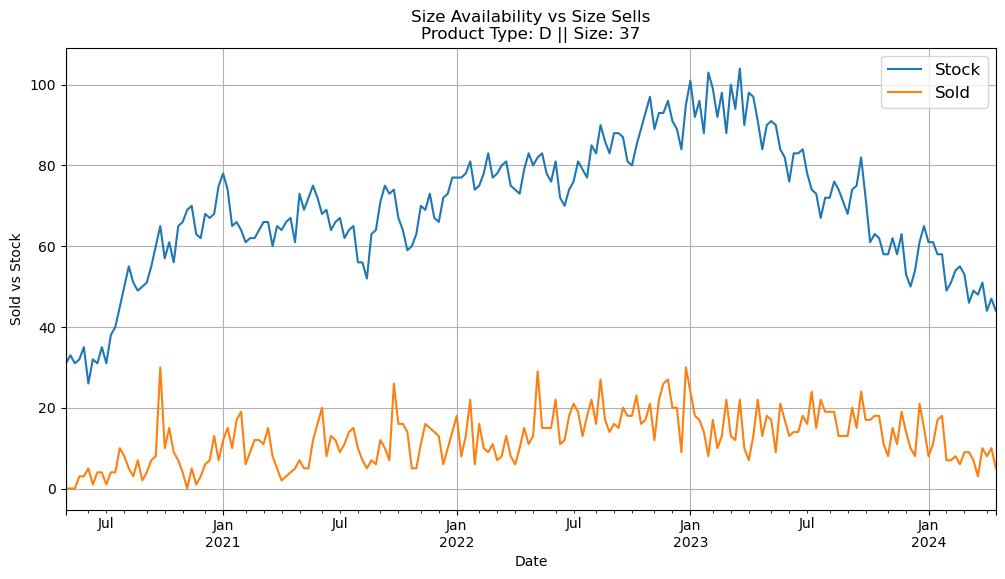

In [22]:
util.plot_size_stock_vs_sold(DataTable_sizes_availability, DataTable_sizes_sold, 'D', '37')

_Product type_ = _'CB'_ is the one of the types with less availability and sales.

From the plot one could observe that each size is available in the stock only with a limited number, and sometimes this availability tend to zero. Probably it's a product type that is not wanted, but one could consider the case to enlarge the products' stocks to observe if more customers are captivated to buy them

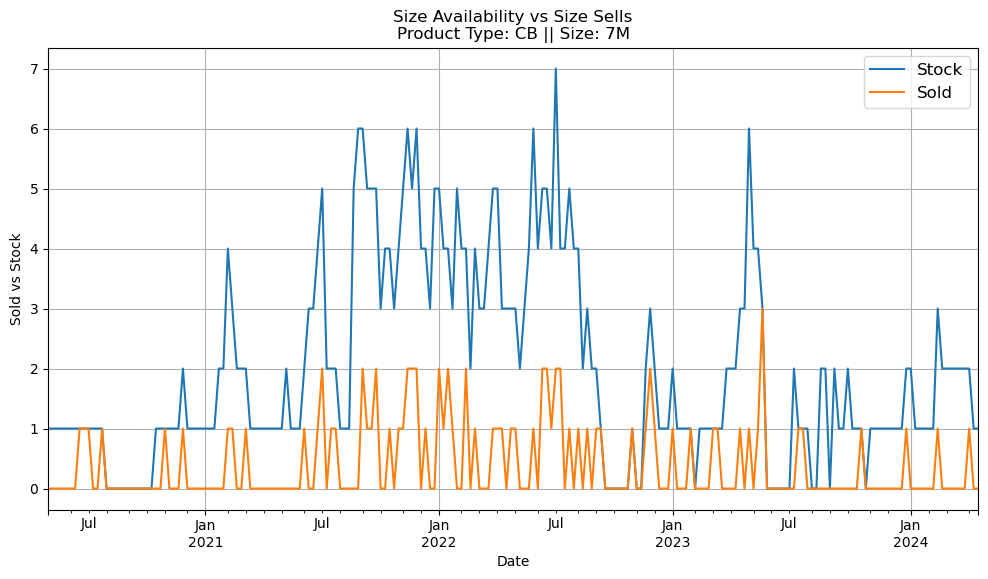

In [23]:
util.plot_size_stock_vs_sold(DataTable_sizes_availability, DataTable_sizes_sold, 'CB', '7M')

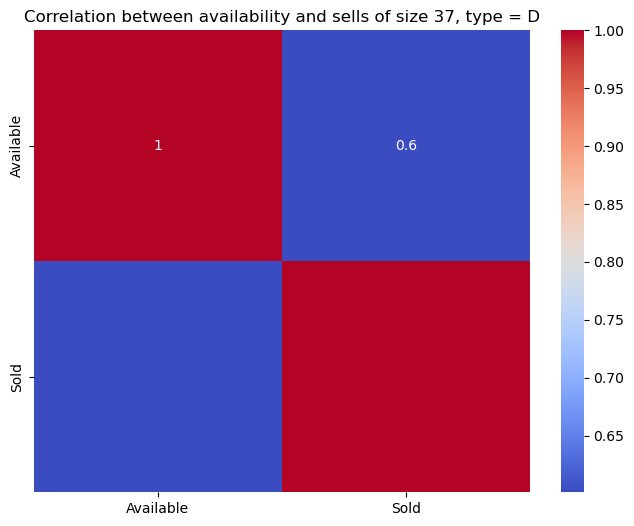

In [24]:
df = {'Available': DataTable_sizes_availability['D']['37'], 'Sold': DataTable_sizes_sold['D']['37']}
dddf = pd.DataFrame(df)

correlation = dddf.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between availability and sells of size 37, type = D')
plt.show()